In [11]:
import numpy as np
import pandas as pd
import glob
import warnings 
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [12]:
filelist = ['/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/amazon_cells_labelled.txt', '/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/imdb_labelled.txt', '/home/yogesh/fall19/ml660/project/sentiment_labelled_sentences/yelp_labelled.txt']

df_uci = pd.concat([pd.read_csv(item, header=None, sep='\t') for item in filelist], axis=0)
df_uci.columns = ['reviews', 'sentiment']

In [13]:
reviews = df_uci.reviews.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
# words = [word for word in tokens if word.isalpha()]


In [10]:
len(tokens)

41516

In [24]:
fdist = FreqDist()

for word in tokens:
    fdist[word.lower()] += 1   
fdist

FreqDist({'.': 2634, 'the': 1942, ',': 1306, 'and': 1134, 'i': 1026, 'a': 886, 'it': 784, 'is': 761, 'to': 667, 'this': 642, ...})

In [23]:
fdist_top50 = fdist.most_common(50)

In [26]:
#removing stopords 

stop_words = set(stopwords.words('english'))
stop_word_tokens = [w for w in tokens if not w in stop_words]
# words = [word for word in tokens if word.isalpha()]
# for w in 

In [28]:
for word in stop_word_tokens:
    fdist[word.lower()] += 1   
fdist

FreqDist({'.': 5268, ',': 2612, 'the': 2408, 'i': 2018, 'and': 1162, '!': 1006, 'it': 984, 'a': 924, 'this': 821, 'is': 765, ...})

In [29]:
len(stop_word_tokens)

27054

In [30]:
words = [word for word in stop_word_tokens if word.isalpha()]

In [31]:
len(words)

20413

In [34]:
fdist_2 = FreqDist()

for word in words:
    fdist_2[word.lower()] += 1   
fdist_2

FreqDist({'i': 992, 'the': 466, 'good': 225, 'great': 209, 'it': 200, 'movie': 180, 'this': 179, 'phone': 165, 'film': 159, 'one': 145, ...})

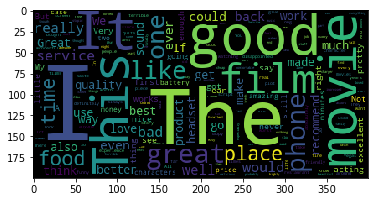

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

frequency_dist = nltk.FreqDist(words) 
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("on")
plt.show()

In [41]:
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator

char_mask = np.array(Image.open("/home/yogesh/Git/sentiment_analysis/image.jpg"))    
image_colors = ImageColorGenerator(char_mask)

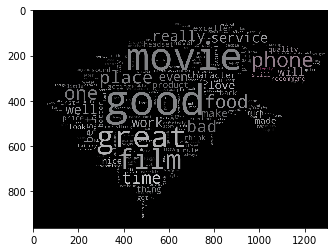

In [46]:
wc = WordCloud(background_color="black", max_words=200, width=400, height=400, mask=char_mask, random_state=1).generate(reviews)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))

In [47]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(words)

'So way plug US unless I go converter Good case Excellent value Great jawbone Tied charger conversations lasting PROBLEMS The mic great I jiggle plug get line right get decent volume If several dozen several hundred contacts imagine fun sending one one If Razr owner must Needless say I wasted money What waste money time And sound quality great He impressed going original battery extended battery If two seperated mere ft I started notice excessive static garbled sound headset Very good quality though The design odd ear clip comfortable Highly recommend one blue tooth phone I advise EVERYONE DO NOT BE FOOLED So Far So Good Works great It clicks place way makes wonder long mechanism would last I went Motorola website followed directions could get pair I bought use Kindle Fire absolutely loved The commercials misleading I yet run new battery two bars three days without charging I bought mother problem battery Great Pocket PC phone combination I owned phone months say best mobile phone I I 